> # Equipo: squirtle
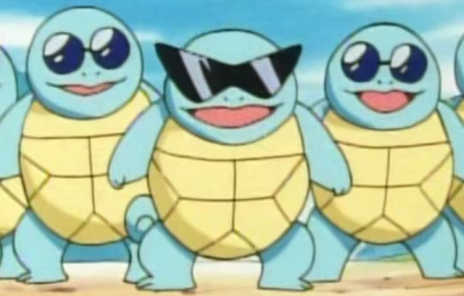

># Cargue los datos en un DataFrame y dele nombre a las columbnas


In [ ]:
from math import sqrt
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# carga el cvs
data = pd.read_csv("/content/housing2.csv")

data.columns =   ['columna1', 'columna2', 'columna3', 'columna4', 'columna5', 'columna6']



# muestra la tabla entera
data




,columna1,columna2,columna3,columna4,columna5,columna6
0,6,5,1080.0,Y,1656,"$215000,0"
1,5,6,882.0,Y,896,"$105000,0"
2,6,6,1329.0,Y,1329,"$172000,0"
3,7,5,2110.0,Y,2110,"$244000,0"
4,5,5,928.0,Y,1629,"$189900,0"
...,...,...,...,...,...,...
2925,6,6,1003.0,Y,1003,"$142500,0"
2926,5,5,864.0,Y,902,"$131000,0"
2927,5,5,912.0,Y,970,"$132000,0"
2928,5,5,1389.0,Y,1389,"$170000,0"


># Genere un resumen de los datos a través del método info()y verifique si el tipo de datos de cada columna es correcto.

In [ ]:
# informacion general de la tabla:
print("INFORMACION DATOS CVS")
data.info()

INFORMACION DATOS CVS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   columna1  2930 non-null   int64  
 1   columna2  2930 non-null   int64  
 2   columna3  2929 non-null   float64
 3   columna4  2930 non-null   object 
 4   columna5  2930 non-null   int64  
 5   columna6  2930 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 137.5+ KB


># Genere un conjunto de datos de prueba con el 20% de los datos disponibles.

In [ ]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

test_df


,columna1,columna2,columna3,columna4,columna5,columna6
1357,8,7,588.0,Y,1666,"$161000,0"
2367,6,7,494.0,Y,1030,"$116000,0"
2822,7,5,796.0,Y,1724,"$196500,0"
2126,4,5,990.0,Y,990,"$123600,0"
1544,6,8,894.0,Y,919,"$126000,0"
...,...,...,...,...,...,...
2268,7,5,868.0,Y,1146,"$187500,0"
456,10,5,2492.0,Y,2492,"$552000,0"
462,7,5,1405.0,Y,1405,"$173000,0"
2168,5,5,936.0,Y,936,"$118500,0"


> # ¿Qué tratamiento daría a la característica Central Air?
# La característica "Central Air" es una variable categórica que indica si la propiedad tiene un sistema de aire acondicionado central . Dado que es una variable categórica, puedes considerar convertirla en una variable binaria, donde 1 indica la presencia de aire acondicionado central y 0 indica la ausencia.

In [ ]:
data['columna4'] = data['columna4'].apply(lambda x: 0 if x == 'Y' else 1)

data

,columna1,columna2,columna3,columna4,columna5,columna6
0,6,5,1080.0,0,1656,"$215000,0"
1,5,6,882.0,0,896,"$105000,0"
2,6,6,1329.0,0,1329,"$172000,0"
3,7,5,2110.0,0,2110,"$244000,0"
4,5,5,928.0,0,1629,"$189900,0"
...,...,...,...,...,...,...
2925,6,6,1003.0,0,1003,"$142500,0"
2926,5,5,864.0,0,902,"$131000,0"
2927,5,5,912.0,0,970,"$132000,0"
2928,5,5,1389.0,0,1389,"$170000,0"


> # Verifique si existen valores faltantes.

In [ ]:
# Verificar valores faltantes por columna
valores_faltantes = data.isna().sum()
valores_faltantes


columna1    0
columna2    0
columna3    1
columna4    0
columna5    0
columna6    0
dtype: int64

># En caso de existir determine cual es la mejor estrategia a utilizar.

In [ ]:
imputer = SimpleImputer(strategy='mean')
c_valores_faltantes = ['columna3']
data[c_valores_faltantes] = imputer.fit_transform(data[c_valores_faltantes])

valores_faltantes = data.isna().sum()
valores_faltantes

columna1    0
columna2    0
columna3    0
columna4    0
columna5    0
columna6    0
dtype: int64

In [ ]:
# verificacion de datos null
print("Datos nulos")
data.isnull().sum()

Datos nulos


columna1    0
columna2    0
columna3    0
columna4    0
columna5    0
columna6    0
dtype: int64

> # Realice el proceso de escalado de los datos utilizando la clase StandarScaler()


In [ ]:
from sklearn.preprocessing import StandardScaler


columnasEscaladas = ['columna1', 'columna2', 'columna3', 'columna4','columna5']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar el escalado a las columnas seleccionadas
data[columnasEscaladas] = scaler.fit_transform(data[columnasEscaladas])


># Construya un pipeline que incluya los pasos de imputación de valores faltantes y el proceso de escalado

In [ ]:
pasos = [
    ('imputador', SimpleImputer(strategy='most_frequent')),
    ('escalador', StandardScaler())
]

# Paso 2: Crear el pipeline
pipeline = Pipeline(pasos)

# Paso 3: Aplicar el pipeline a las columnas seleccionadas
data[columnasEscaladas + c_valores_faltantes] = pipeline.fit_transform(
    data[columnasEscaladas + c_valores_faltantes])

># Realice las transformaciones sobre los datos de entrenamiento utilizando el pipeline


In [16]:
# Supongamos que 'train_df' es tu conjunto de datos de entrenamiento y 'pipeline' es tu pipeline definido

# Seleccionar las columnas que quieres imputar y escalar
columnas_a_transformar = ['columna1', 'columna2', 'columna3', 'columna4', 'columna5']

# Aplicar el pipeline a las columnas seleccionadas
data[columnas_a_transformar] = pipeline.fit_transform(data[columnas_a_transformar])


In [ ]:
# funcion que describe el entrenamiento este  encontramos valores
# como media, mediana, valores minimos, etc.
train_df.describe()

,columna1,columna2,columna3,columna5
count,2344.00000,2344.000000,2343.000000,2344.000000
mean,6.06442,5.581911,1047.022194,1492.859642
std,1.38852,1.105659,436.567117,504.619676
min,1.00000,1.000000,0.000000,334.000000
25%,5.00000,5.000000,784.000000,1121.750000
50%,6.00000,5.000000,988.000000,1436.500000
75%,7.00000,6.000000,1288.000000,1734.000000
max,10.00000,9.000000,6110.000000,5642.000000
